<a href="https://colab.research.google.com/github/Wymiotron/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
test_df = pd.read_csv('test.csv')

In [6]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
train_df.shape

(891, 12)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [11]:
train_df.drop("Cabin", axis=1, inplace=True)

In [12]:
test_df.drop("Cabin", axis=1, inplace=True)

In [13]:
train_df[train_df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN

In [14]:
train_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [16]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [17]:
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [18]:
all_data = [train_df, test_df]

In [19]:
for dataset in all_data:
  dataset['family_size'] = dataset['SibSp'] + dataset['Parch'] + 1

In [20]:
import re

In [21]:
def get_title(name):
  title_search = re.search(' ([A-Z a-z]+)\.', name)
  if title_search:
    return title_search.group(1)
  return ""
  
 

In [22]:
for dataset in all_data:
  dataset['Title'] = dataset['Name'].apply(get_title)

In [23]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [24]:
for dataset in all_data:
  dataset['Title'] = dataset['Title'].replace(['Mile','Ms'], 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')

In [25]:
for dataset in all_data:
  dataset['Title'] = dataset['Title'].replace(['Dr','Rev','Major','Col',
                                               'Jonkheer','Capt','Sir','Don' ,
                                               'the Countess','Lady','Dona'], 'Rare')

In [26]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [27]:
for dataset in all_data:
  dataset['Age_bin'] = pd.cut(dataset['Age'], bins = [0,12,20,40,120], 
                              labels = ['Child', 'Teenage', 'Adult', 'Elder'])

In [28]:
for dataset in all_data:
  dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins = [0,8,14,31,120], 
                              labels = ['Low_fare', 'Medium_fare', 'Avg_fare', 'High_fare'])

In [29]:
passenger_id = test_df['PassengerId']

In [30]:
pass_id= passenger_id

In [31]:
for dataset in all_data:
  drop_column=['PassengerId','Name','Age','SibSp','Parch', 'Ticket','Fare']
  dataset.drop(drop_column, axis=1, inplace=True)

In [32]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'], prefix =['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'])

In [33]:
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'], prefix =['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'])

In [34]:
train_df.head()

Survived  Pclass  family_size  Sex_female  Sex_male  Embarked_C  \
0         0       3            2           0         1           0   
1         1       1            2           1         0           1   
2         1       3            1           1         0           0   
3         1       1            2           1         0           0   
4         0       3            1           0         1           0   

   Embarked_Q  Embarked_S  Title_Master  Title_Miss  ...  Title_Mrs  \
0           0           1             0           0  ...          0   
1           0           0             0           0  ...          1   
2           0           1             0           1  ...          0   
3           0           1             0           0  ...          1   
4           0           1             0           0  ...          0   

   Title_Rare  Age_bin_Child  Age_bin_Teenage  Age_bin_Adult  Age_bin_Elder  \
0           0              0                0              1              0   
1           0              0                0              1              0   
2           0              0                0              1              0   
3           0              0                0              1              0   
4           0              0                0              1              0   

   Fare_bin_Low_fare  Fare_bin_Medium_fare  Fare_bin_Avg_fare  \
0                  1                     0                  0   
1                  0                     0                  0   
2                  1                     0                  0   
3                  0                     0                  0   
4                  0                     1                  0   

   Fare_bin_High_fare  
0                   0  
1                   1  
2                   0  
3                   1  
4                   0  

[5 rows x 21 columns]

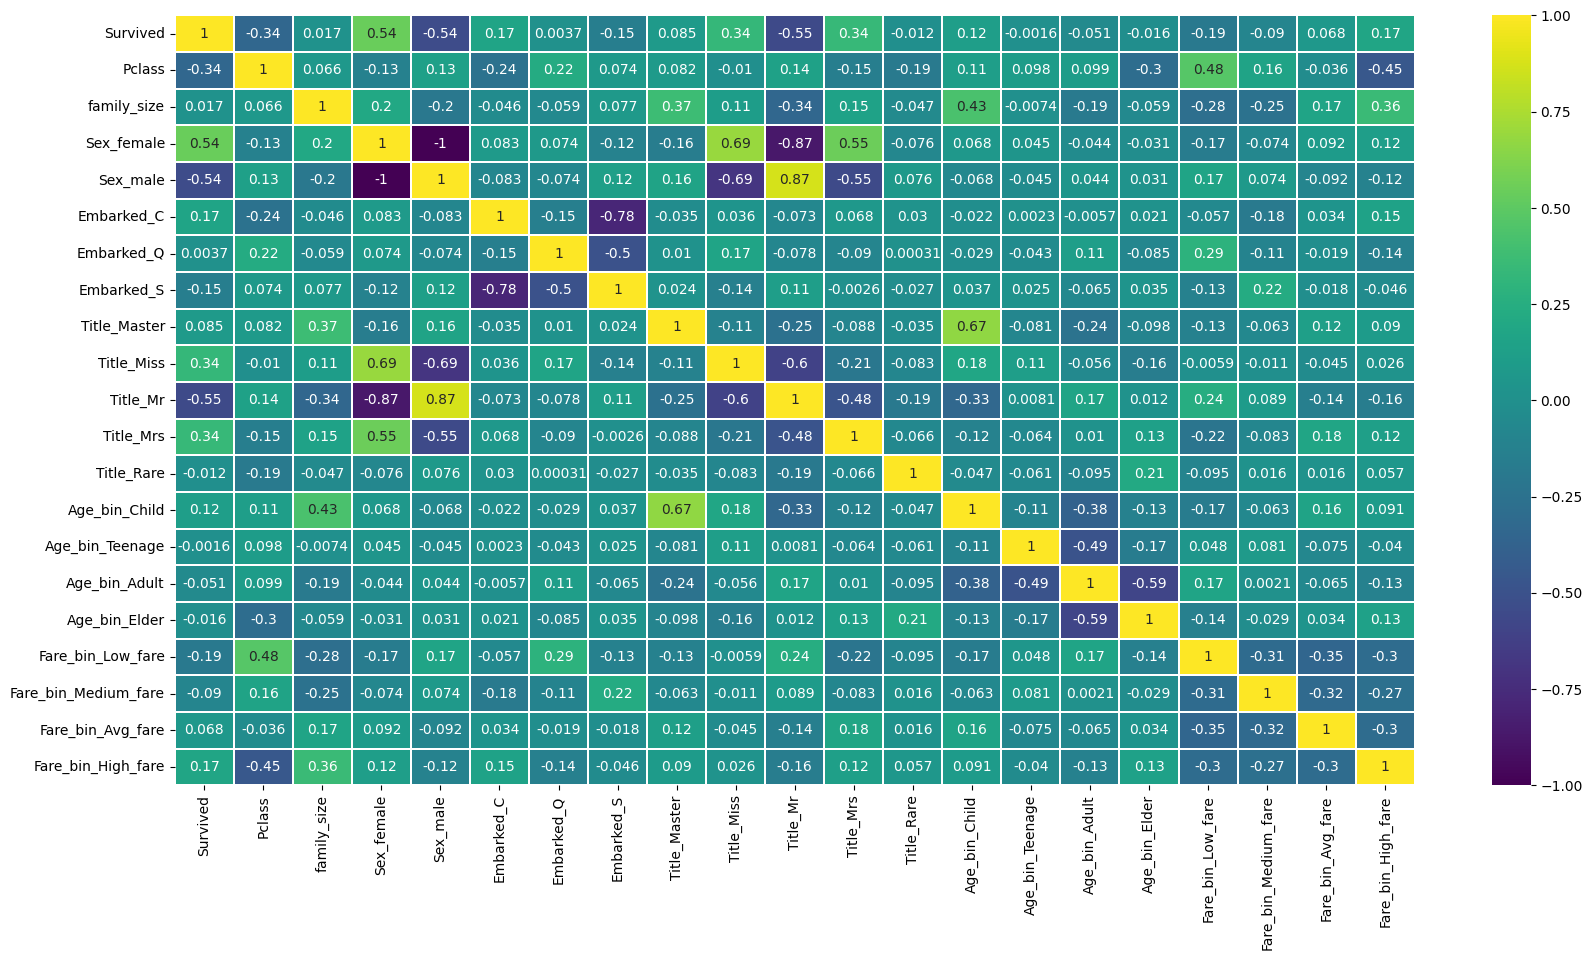

In [35]:

sns.heatmap(train_df.corr(),annot=True, cmap='viridis',linewidths=0.2)
fig =plt.gcf()
fig.set_size_inches(20,10)

In [36]:
train_X = train_df.drop("Survived", axis=1)

In [37]:
train_y = train_df["Survived"]

In [38]:
train_X.shape

(891, 20)

In [39]:
train_y.shape

(891,)

In [40]:
# def titanic():
#   model = models.Sequential()
#   model.add(layers.Dense(64, activation='relu', input_shape=(20,)))
#   model.add(layers.Dense(32, activation='relu'))
#   model.add(layers.Dense(16, activation='relu'))
#   model.add(layers.Dense(1, activation='sigmoid'))
#   model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#   return model

In [41]:
# model = titanic()

In [42]:
# model.summary()

In [43]:
# history = model.fit(train_X, train_y, epochs=50, batch_size=120, validation_split=0.2)

In [44]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [45]:
model.fit(train_X, train_y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [49]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [50]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [51]:
grid_search.fit(train_X, train_y)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [52]:
grid_search.best_score_

0.8305407425362582

In [53]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [54]:
pred = model.predict(test_df)

In [55]:
pred.shape

(418,)

In [56]:
for i in range(len(pred)):
  if pred[i] < 0.5:
    pred[i] = 0
  else:
    pred[i] = 1


In [57]:
df = pd.DataFrame(pred)

In [58]:
df = df.astype(int)

In [59]:
submission = pd.DataFrame({'PassengerId': pass_id, 'Survived': df[0]})

In [60]:
submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [61]:
submission.to_csv('titanic.csv', index=False)

In [68]:
plt.figure(figsize=(200,100))
plot_tree(rf_best.estimators_[5], feature_names = train_X.columns,class_names=['Survived', "Not Survived"],filled=True);

In [69]:
rf_best.feature_importances_

array([0.15526639, 0.07859017, 0.16821679, 0.18825717, 0.01168469,
       0.00617897, 0.01458814, 0.01981319, 0.05971077, 0.12299067,
       0.0593037 , 0.00666731, 0.02153518, 0.00409762, 0.00904709,
       0.00898576, 0.01421489, 0.00797987, 0.01863006, 0.02424158])

In [71]:
imp_df = pd.DataFrame({
    "Varname": train_X.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
3               Sex_male  0.188257
2             Sex_female  0.168217
0                 Pclass  0.155266
9               Title_Mr  0.122991
1            family_size  0.078590
8             Title_Miss  0.059711
10             Title_Mrs  0.059304
19    Fare_bin_High_fare  0.024242
12         Age_bin_Child  0.021535
7           Title_Master  0.019813
18     Fare_bin_Avg_fare  0.018630
6             Embarked_S  0.014588
16     Fare_bin_Low_fare  0.014215
4             Embarked_C  0.011685
14         Age_bin_Adult  0.009047
15         Age_bin_Elder  0.008986
17  Fare_bin_Medium_fare  0.007980
11            Title_Rare  0.006667
5             Embarked_Q  0.006179
13       Age_bin_Teenage  0.004098